In [1]:
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
##Classification using pytorch 



##Data 
##Make some calssification data and get it red 
import sklearn 
from sklearn.datasets import make_circles 

#make 1000 samples 
n_samples = 1000 

#create circles 
#x = features 
#y = labels
X,y = make_circles(n_samples=1000,
                   noise = 0.03,
                   random_state=42)

print(len(X),len(y))
#print the first 5 
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

1000 1000
First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [2]:
#make a dataframe of circle data 
import pandas as pd 
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


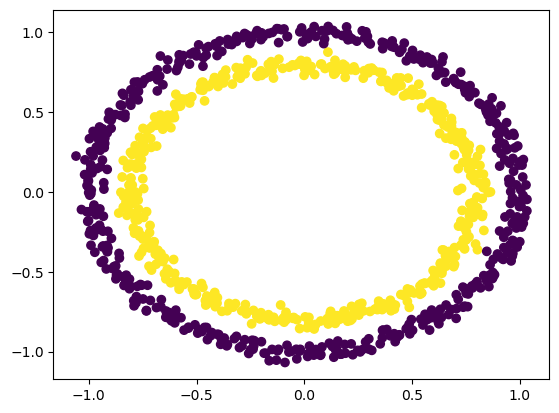

In [3]:
#visualise using graphics 
import matplotlib.pyplot as plt
plt.scatter (x=X[:,0],
             y=X[:,1],
             c=y)
             

#with a given x and y point determin which circle it is weither inner or outer 

In [4]:
#check input and output shapes 
print (X)
X_sample=X[0]
y_sample=y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")
# 2 featues of x to predict one value of y(label)


[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 ...
 [-0.13690036 -0.81001183]
 [ 0.67036156 -0.76750154]
 [ 0.28105665  0.96382443]]
Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [5]:
#turning the data into tensors and create train and test splits 

#turn data into tensors 
import torch 


X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
#turns X into torch . float (32)



In [6]:
#X and y is now a tensor
X[:5],y[:5]



(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [7]:
#splitting data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,#0.2 = 20% of the data will be test and 80% is train
                                                    random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
len(X_train),len(X_test),len(y_train),len(y_test)

torch.Size([800, 2]) torch.Size([200, 2]) torch.Size([800]) torch.Size([200])


(800, 200, 800, 200)

In [8]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)
        self.twolayer = nn.Sequential(
            nn.Linear(in_features=2,out_features=5),
            nn.Linear(in_features=5,out_features=1)
            
        )
    
    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.twolayer(x) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0()
   

In [9]:
#replicated the model abouve using nn.Sequential

model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (twolayer): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [10]:
with torch.inference_mode():
    untrained_preds = model_0(X_test)
print(f"First 10 predictions : \n {untrained_preds[:10]}")
print(f"Frist 10 labels :\ {y_test[:10]}")


First 10 predictions : 
 tensor([[-0.0292],
        [-0.1385],
        [ 0.0079],
        [-0.0387],
        [-0.3880],
        [-0.4517],
        [-0.4457],
        [-0.5200],
        [ 0.0246],
        [-0.1503]])
Frist 10 labels :\ tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [11]:
#Setting up loss function and optimizer 
loss_fn = nn.BCEWithLogitsLoss()

optimzer=torch.optim.SGD(params=model_0.parameters(),
                         lr = 0.1)
    
    
#caluclating the accuracy 
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc=correct/len(y_true)*100 
    return acc 
    

In [12]:
# 3.1
#TRAINING THE MODEL 
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test)

#using the sigmoide function 
y_pred_probs = torch.sigmoid(y_logits)
y_pred = torch.round(y_pred_probs)

y_pred

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [13]:
torch.manual_seed(42)
epochs = 1000


for epoch in range (epochs):
    #training 
    model_0.train()
    #1. forward pass 
    y_logits = model_0.forward(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))# logits->pred probs -> pred lablts 
    #2. caluclated loss / accuracy 
    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 
    
    # 3.0 zero grad 
    optimzer.zero_grad()
    #4.0 loss backward (back prop) 
    loss.backward()
    #5.0 optimzer step (Gradeint descent) 
    optimzer.step()
    
    #testing 
    model_0.eval()
    with torch.inference_mode():
        #1. forward pass 
        test_logits = model_0(X_test).squeeze()
        test_pred   = torch.round(torch.sigmoid(test_logits))
        
        #2. valuclated test loss/acc 
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true = y_test, y_pred=test_pred)
        
        #print out what is happening 
        if epoch%10 == 0: 
            print(f"Epoch {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f} %")
    
   
    
    
    

Epoch 0 | Loss: 0.70450 | Acc: 46.75 | Test loss: 0.70122 | Test acc: 45.50 %
Epoch 10 | Loss: 0.70091 | Acc: 48.50 | Test loss: 0.69850 | Test acc: 46.50 %
Epoch 20 | Loss: 0.69873 | Acc: 49.00 | Test loss: 0.69702 | Test acc: 47.50 %
Epoch 30 | Loss: 0.69734 | Acc: 49.38 | Test loss: 0.69620 | Test acc: 45.50 %
Epoch 40 | Loss: 0.69641 | Acc: 49.50 | Test loss: 0.69574 | Test acc: 46.50 %
Epoch 50 | Loss: 0.69574 | Acc: 49.75 | Test loss: 0.69548 | Test acc: 47.50 %
Epoch 60 | Loss: 0.69524 | Acc: 50.25 | Test loss: 0.69532 | Test acc: 46.50 %
Epoch 70 | Loss: 0.69486 | Acc: 49.88 | Test loss: 0.69523 | Test acc: 48.00 %
Epoch 80 | Loss: 0.69456 | Acc: 49.75 | Test loss: 0.69517 | Test acc: 49.50 %
Epoch 90 | Loss: 0.69432 | Acc: 49.50 | Test loss: 0.69514 | Test acc: 52.00 %
Epoch 100 | Loss: 0.69412 | Acc: 49.12 | Test loss: 0.69511 | Test acc: 51.00 %
Epoch 110 | Loss: 0.69396 | Acc: 49.50 | Test loss: 0.69510 | Test acc: 51.00 %
Epoch 120 | Loss: 0.69382 | Acc: 49.62 | Test loss:

In [14]:
#imporving the model by adding more hidden units 5->10 
#improving the model by inserting a layer 
class CircleModelV1 (nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=1)
        
        
    def forward(self,x):
        return self.layer_3(self.layer_2(self.layer_1(x)))
    
model_1 = CircleModelV1()
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [15]:
#create a loss fucntion 
loss_fn = nn.BCEWithLogitsLoss()


#create an optomizer 
optimzer=torch.optim.SGD(params=model_1.parameters(),
                         lr = 0.1)

torch.manual_seed(42)

epochs = 1000

for epoch in range (epochs):
    model_1.train()
    #1. forward pass 
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    # 2. calculated the loss / acc 
    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_train,y_pred)
    # 3.0 zero grad 
    optimzer.zero_grad()
    #4.0 loss backwards 
    loss.backward()
    #5.0 optimer step 
    optimzer.step()
    
    #Testing 
    model_1.eval()
    with torch.inference_mode():
        #1. forwadd 
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        #2, calyuclated the loss 
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_test,test_pred)
    #3. print 
    if epoch % 100 ==0: 
        print(f"Epoch : {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test acc: {test_acc:.2f} %")

        
        
        
        
        
        
        
        

Epoch : 0 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test acc: 51.00 %
Epoch : 100 | Loss: 0.69305 | Acc: 50.38% | Test Loss: 0.69379 | Test acc: 48.00 %
Epoch : 200 | Loss: 0.69299 | Acc: 51.12% | Test Loss: 0.69437 | Test acc: 46.00 %
Epoch : 300 | Loss: 0.69298 | Acc: 51.62% | Test Loss: 0.69458 | Test acc: 45.00 %
Epoch : 400 | Loss: 0.69298 | Acc: 51.12% | Test Loss: 0.69465 | Test acc: 46.00 %
Epoch : 500 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69467 | Test acc: 46.00 %
Epoch : 600 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test acc: 46.00 %
Epoch : 700 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test acc: 46.00 %
Epoch : 800 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test acc: 46.00 %
Epoch : 900 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test acc: 46.00 %


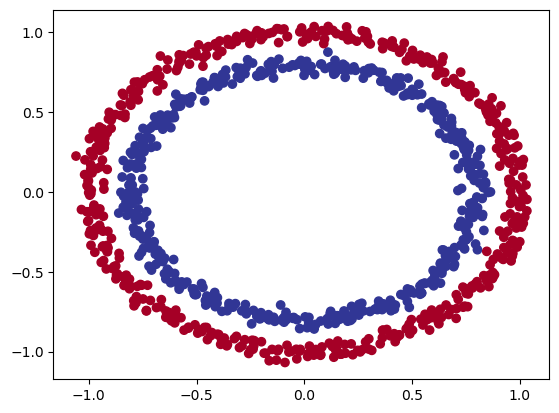

In [16]:
##the missign peice non-linearity 
# 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)
#plt.scatter(X[:,0],X[:,1])
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

In [17]:
#convert data to tensors and then to train 
import torch 
from sklearn.model_selection import train_test_split


X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [18]:
#splitting the data 
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [19]:
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Linear(in_features=2,out_features=10)
        self.layer2=nn.Linear(in_features=10,out_features=10)
        self.layer3=nn.Linear(in_features=10,out_features=1)
       
        self.relu = nn.ReLU()
        
    def forward(self,x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))
    
        
        
model_3 = CircleModelV2()
model_3.parameters()


        

<generator object Module.parameters at 0x3085a4a50>

In [20]:
#bulid a loss function and optomizer 
loss_fn= nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)



In [21]:
#create random seet 
torch.manual_seed(42)
epochs = 3000


for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%
Epoch: 1000 | Loss: 0.56818, Accuracy: 87.75% | Test Loss: 0.57378, Test Accuracy: 86.50%
Epoch: 1100 | Loss: 0.

In [22]:
model_3.eval()
with torch.inference_mode():
    y_preds=torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_test[:10],y_preds[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [23]:
X

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        ...,
        [-0.1369, -0.8100],
        [ 0.6704, -0.7675],
        [ 0.2811,  0.9638]])

In [24]:
loss

tensor(0.0167, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)